In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install pymannkendall

In [3]:
!pip install pyhomogeneity

In [4]:
import matplotlib.pyplot as plt
import numpy as np

import pandas as pd
import seaborn as sns

from scipy.stats import kendalltau, norm, linregress
import pyhomogeneity as hg

import csv

from statsmodels.tsa.seasonal import STL

In [5]:
data_path_Myladumpara = "/content/drive/MyDrive/ColabNotebooks/IMD-RAINFALL-DATASET/Phase 2-10 DISTRICTS 2012 TO 2023/Vijay/Idukki/MYLADUMPARA AGRI [.csv"

In [6]:
df = pd.read_csv(data_path_Myladumpara )

df_rainfall = df.iloc[:, 2:]

df_rainfall = df_rainfall.apply(pd.to_numeric, errors='coerce')

In [7]:
df.head(5)

,YEAR,MN,DRF01,DRF02,DRF03,DRF04,DRF05,DRF06,DRF07,DRF08,...,DRF22,DRF23,DRF24,DRF25,DRF26,DRF27,DRF28,DRF29,DRF30,DRF31
0,2013,6,32.0,4.3,39.1,1.2,0.4,0.0,5.2,9.1,...,56.1,32.1,61.2,73.2,36.1,27.2,6.2,7.1,0.0,NaN
1,2013,7,4.2,10.1,48.1,21.1,27.1,20.2,18.1,3.4,...,17.1,34.3,45.1,23.4,16.1,8.4,2.4,2.4,0.0,6.4
2,2013,8,1.6,90.2,21.0,6.1,153.0,30.1,3.0,1.1,...,8.3,0.0,0.0,0.0,1.3,0.0,0.0,0.0,45.2,14.4
3,2013,9,1.3,22.2,1.0,16.1,5.0,6.0,2.4,8.0,...,7.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.1,NaN
4,2013,10,2.0,0.0,0.0,1.3,0.0,0.0,0.0,0.4,...,22.4,5.4,1.0,6.1,6.1,0.0,0.0,0.0,0.0,0.0


In [8]:
df_rainfall.head(5)

,DRF01,DRF02,DRF03,DRF04,DRF05,DRF06,DRF07,DRF08,DRF09,DRF10,...,DRF22,DRF23,DRF24,DRF25,DRF26,DRF27,DRF28,DRF29,DRF30,DRF31
0,32.0,4.3,39.1,1.2,0.4,0.0,5.2,9.1,16.0,5.2,...,56.1,32.1,61.2,73.2,36.1,27.2,6.2,7.1,0.0,NaN
1,4.2,10.1,48.1,21.1,27.1,20.2,18.1,3.4,20.4,25.4,...,17.1,34.3,45.1,23.4,16.1,8.4,2.4,2.4,0.0,6.4
2,1.6,90.2,21.0,6.1,153.0,30.1,3.0,1.1,18.3,4.4,...,8.3,0.0,0.0,0.0,1.3,0.0,0.0,0.0,45.2,14.4
3,1.3,22.2,1.0,16.1,5.0,6.0,2.4,8.0,14.1,10.0,...,7.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.1,NaN
4,2.0,0.0,0.0,1.3,0.0,0.0,0.0,0.4,11.0,0.0,...,22.4,5.4,1.0,6.1,6.1,0.0,0.0,0.0,0.0,0.0


In [9]:
with open(data_path_Myladumpara  , 'r') as csv_file:
    # Create a CSV reader object
    csv_reader = csv.reader(csv_file)

    # Read the header row
    header = next(csv_reader)

    print("Column Names:")
    for column_name in header:
        print(column_name, end =" ")

Column Names:
YEAR MN DRF01 DRF02 DRF03 DRF04 DRF05 DRF06 DRF07 DRF08 DRF09 DRF10 DRF11 DRF12 DRF13 DRF14 DRF15 DRF16 DRF17 DRF18 DRF19 DRF20 DRF21 DRF22 DRF23 DRF24 DRF25 DRF26 DRF27 DRF28 DRF29 DRF30 DRF31 

AVERAGE MONTHLY RAINFALL FROM 2012 TO 2022

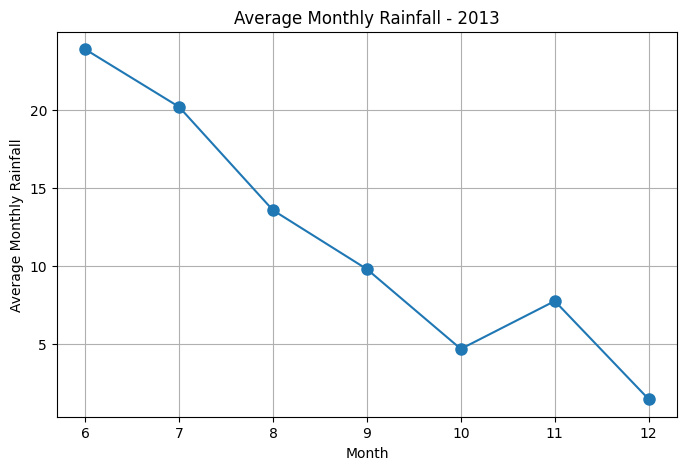

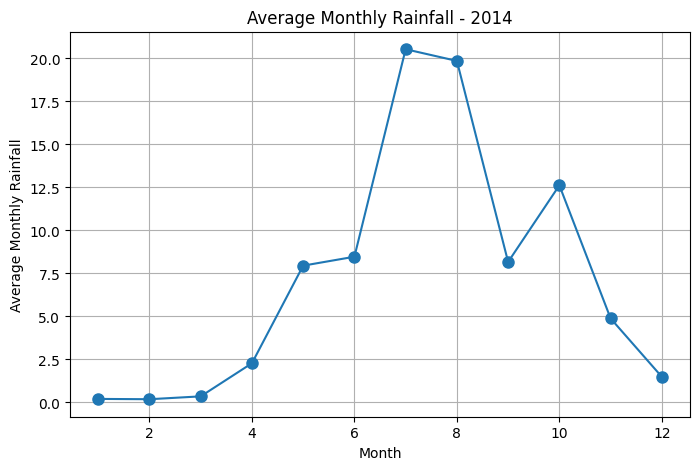

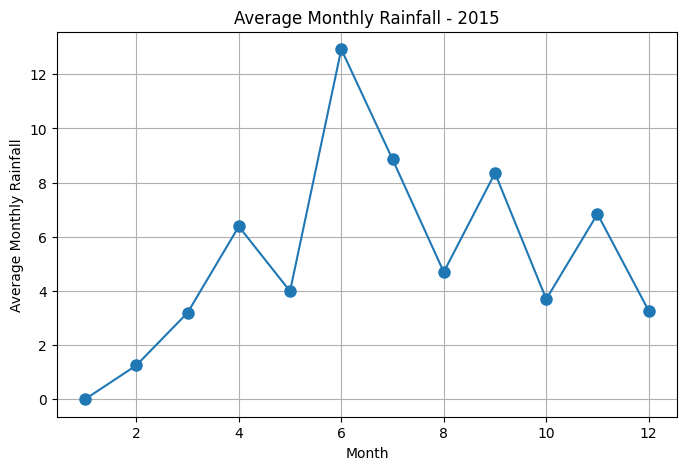

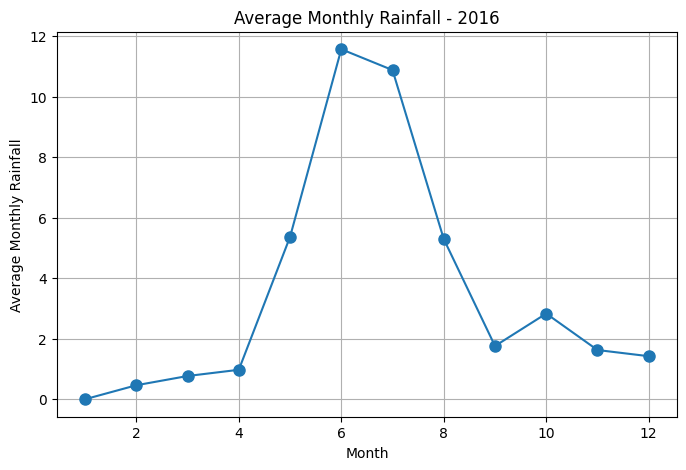

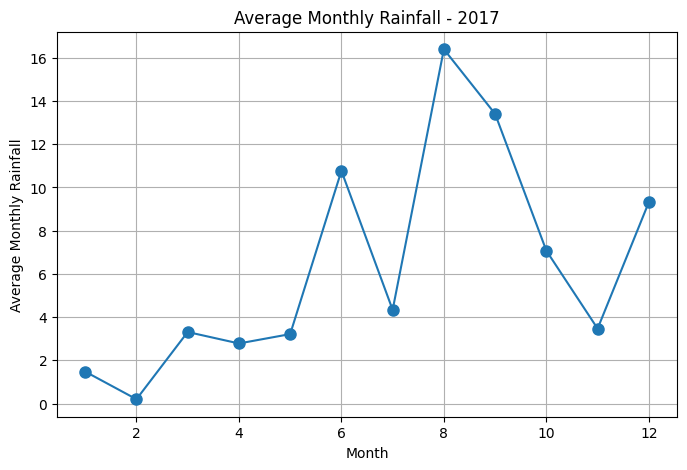

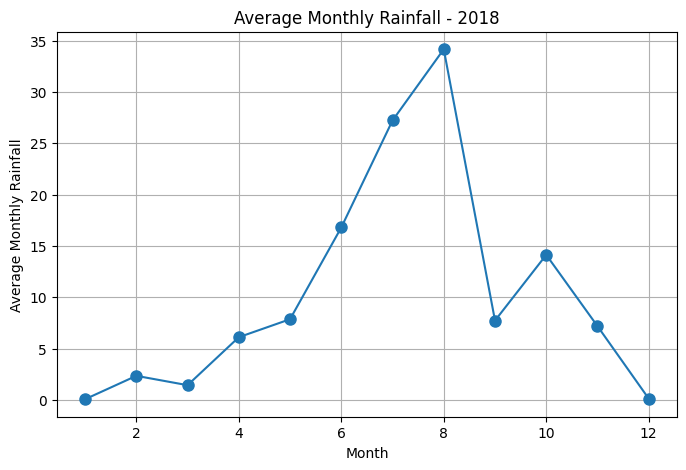

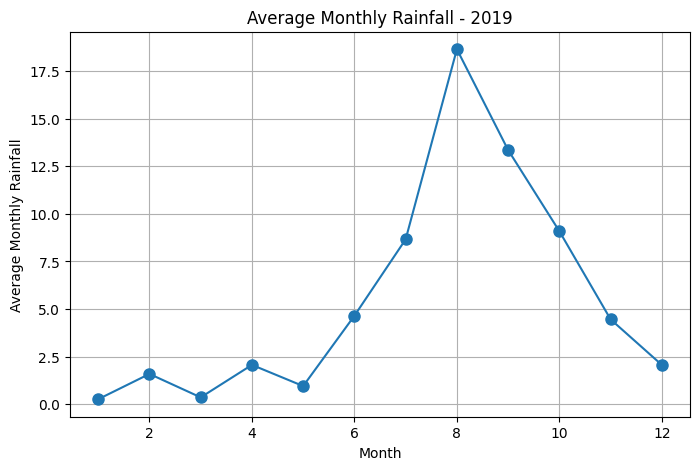

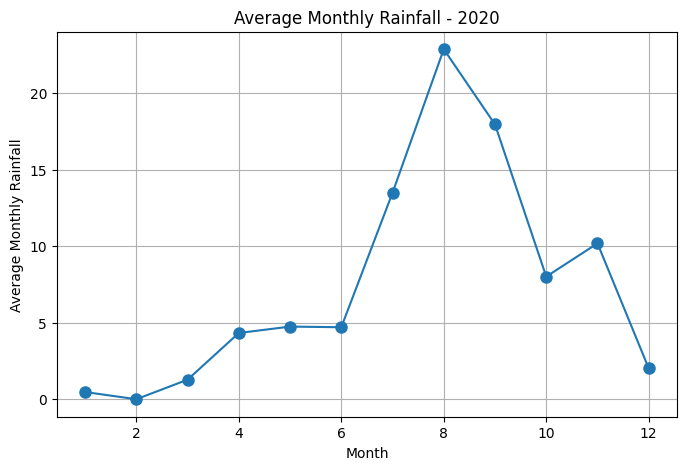

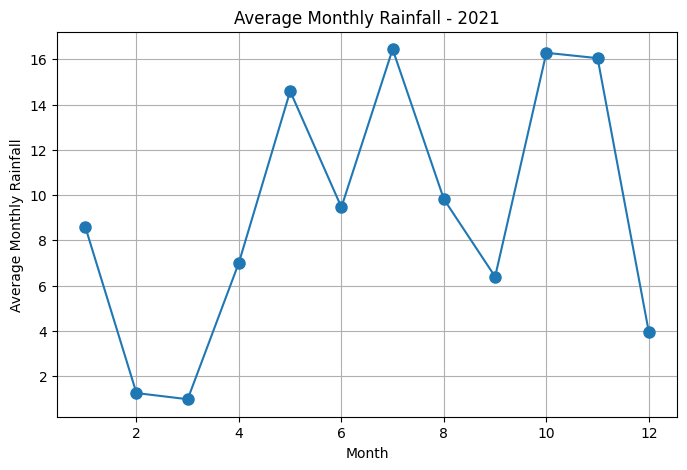

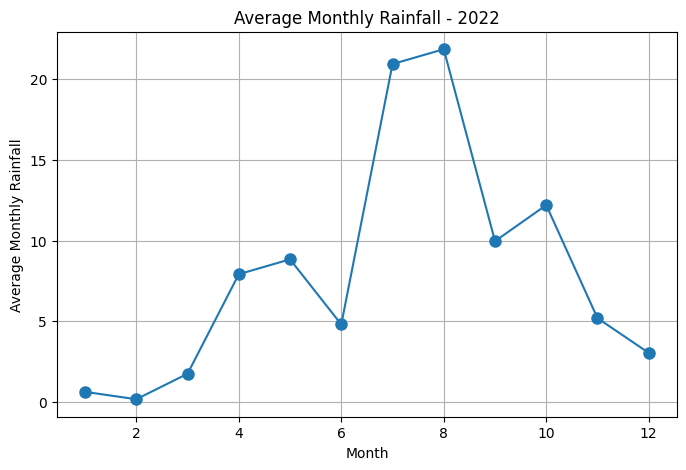

In [10]:
# Calculate the average monthly rainfall for each year
df['Average_Monthly_Rainfall'] = df.iloc[:, 2:].mean(axis=1, skipna=True)

# Iterate over unique years and plot each separately
unique_years = df['YEAR'].unique()

for year in unique_years:
    plt.figure(figsize=(8, 5))

    # Filter data for the specific year
    df_year = df[df['YEAR'] == year]

    # Plotting the data for the current year
    plt.plot(df_year['MN'], df_year['Average_Monthly_Rainfall'], marker='o', linestyle='-', markersize=8)

    plt.title(f'Average Monthly Rainfall - {year}')
    plt.xlabel('Month')
    plt.ylabel('Average Monthly Rainfall')
    plt.grid(True)

    plt.show()


FREQUENCY OF RAINFALL FOR EACH YEAR FROM 2012 TO 2022

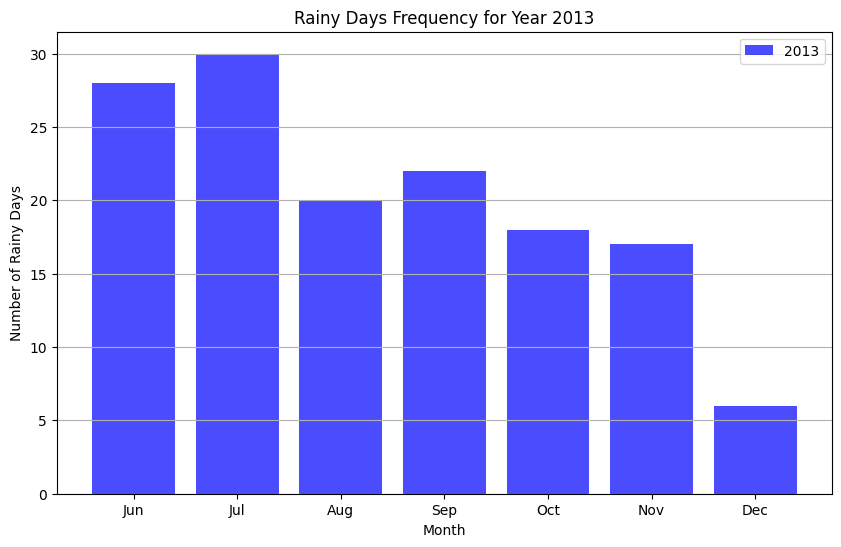

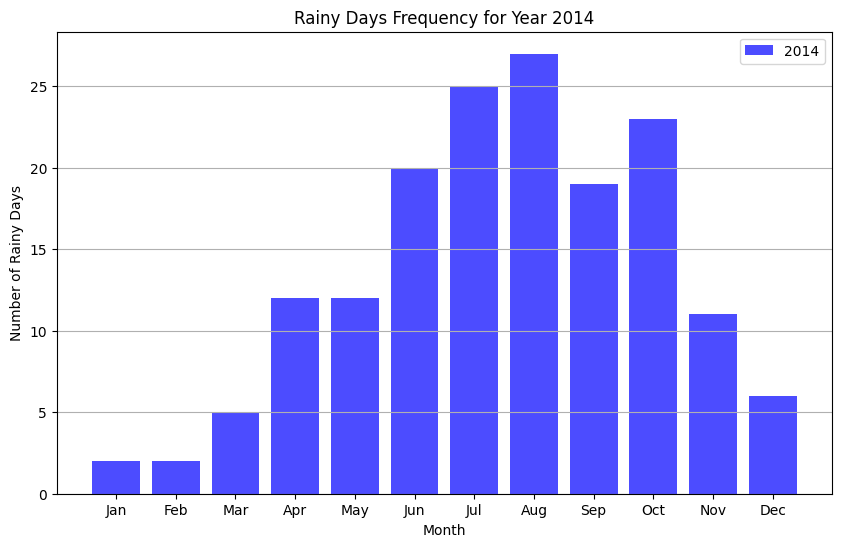

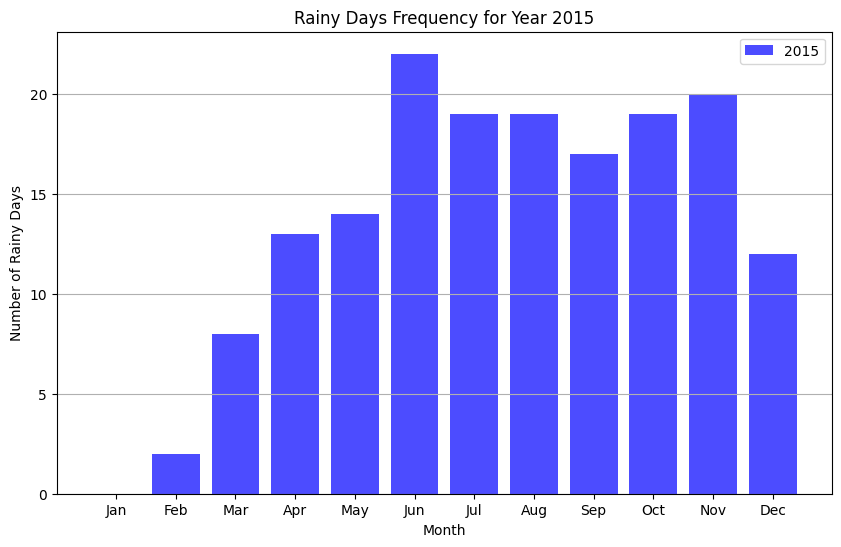

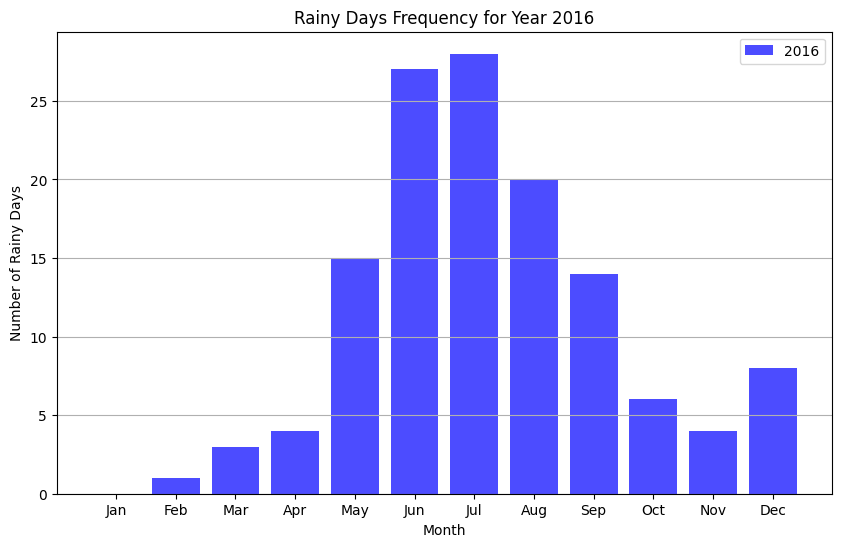

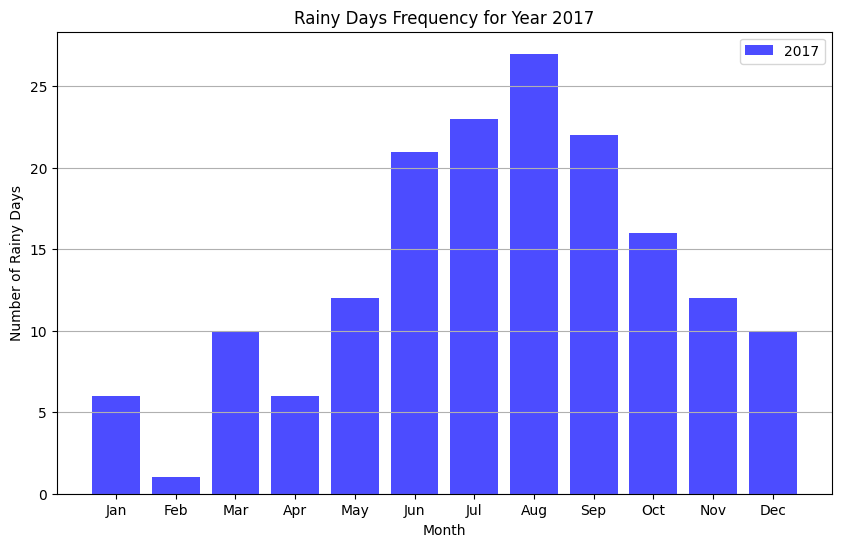

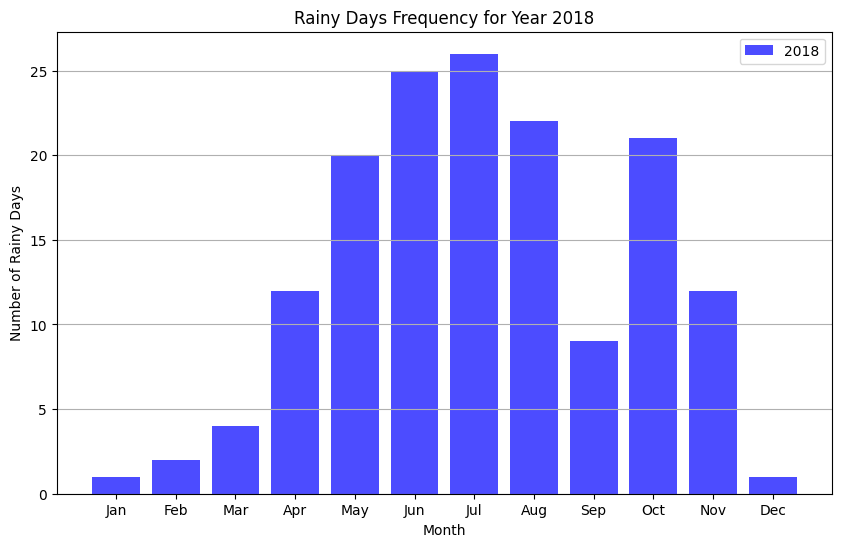

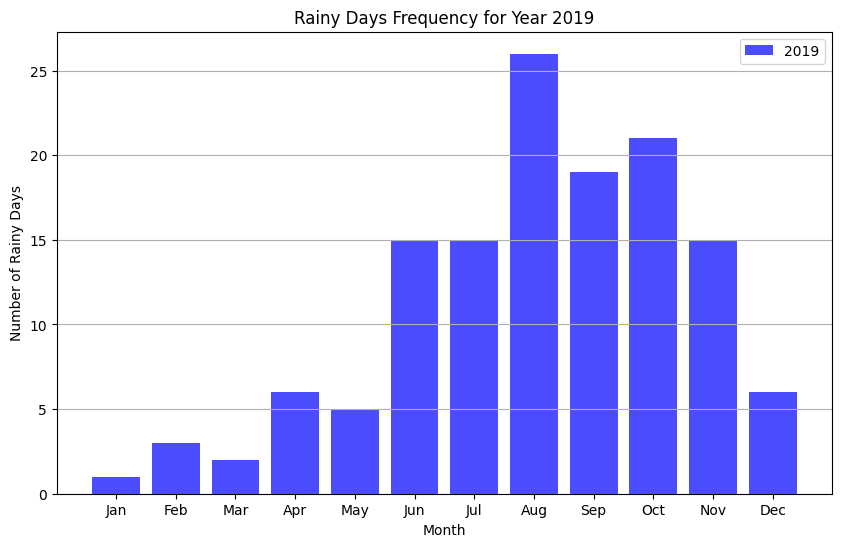

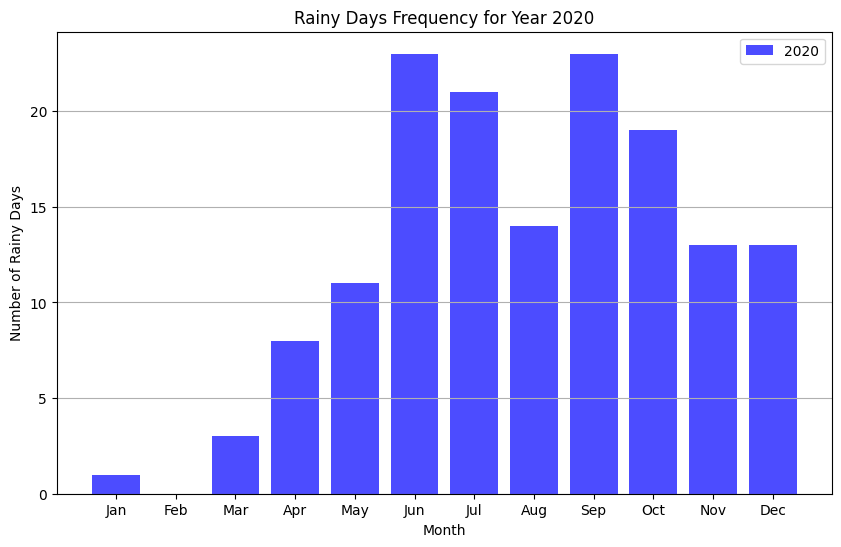

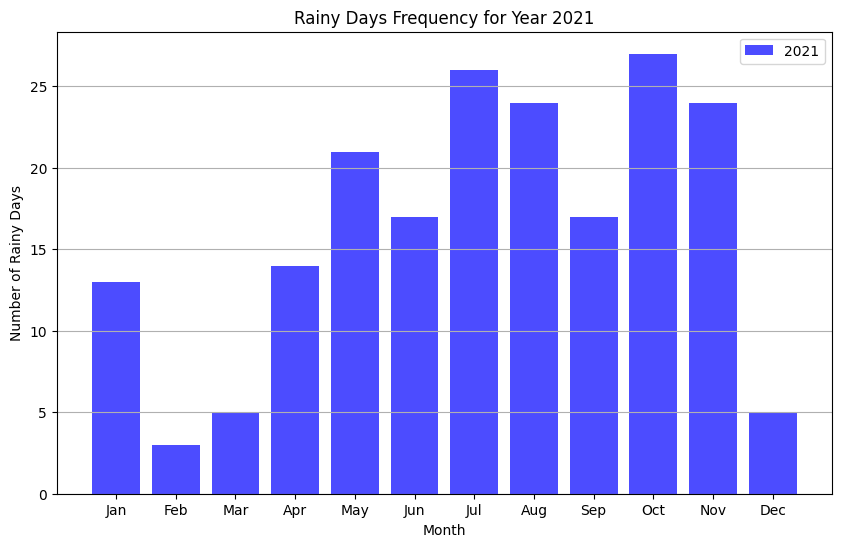

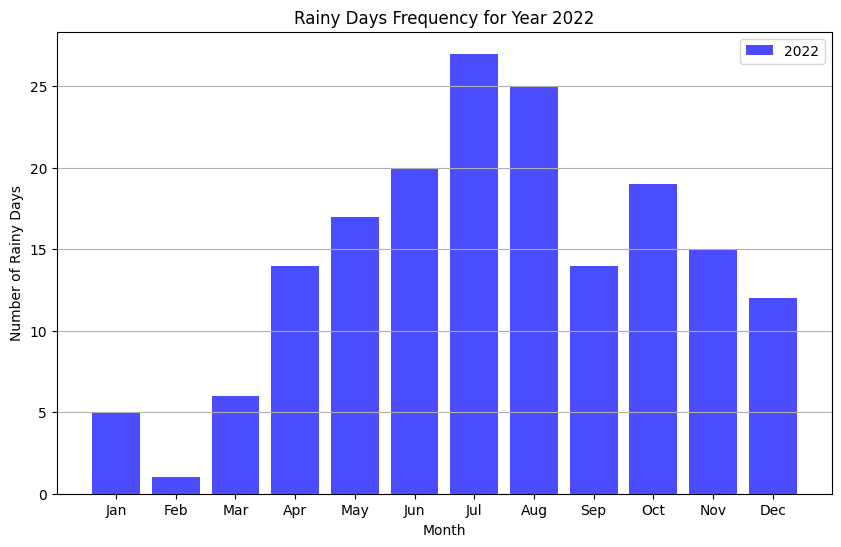

In [11]:
df['Rainy_Days'] = df_rainfall[df_rainfall > 0].count(axis=1)

# Group by year and plot each year's monthly rainfall frequency separately
unique_years = df['YEAR'].unique()

# Define a mapping of month numbers to month names
month_mapping = {
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
    7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
}

for year in unique_years:
    plt.figure(figsize=(10, 6))

    # Select data for the current year
    year_data = df[df['YEAR'] == year].copy()

    # Replace month numbers with month names
    year_data.loc[:, 'Month_Name'] = year_data['MN'].map(month_mapping)

    # Plot monthly rainfall frequency for the current year
    plt.bar(year_data['Month_Name'], year_data['Rainy_Days'], color='blue', alpha=0.7, label=str(year))

    plt.title(f'Rainy Days Frequency for Year {year}')
    plt.xlabel('Month')
    plt.ylabel('Number of Rainy Days')
    plt.legend()
    plt.grid(axis='y')
    plt.show()

PIVOT TABLE WITH AVERAGE MONTHLY RAINFALL AND AVERAGE YEARLY RAINFALL

In [12]:
# Pivot the DataFrame to have months as columns
df_pivot = df.pivot_table(index='YEAR', columns='MN', values='Average_Monthly_Rainfall', aggfunc='mean')

# Rename columns with simple month names
df_pivot.columns = [f'Month {col}' for col in df_pivot.columns]

# Calculate the average yearly rainfall
df_pivot['Average_Yearly_Rainfall'] = df_pivot.mean(axis=1, skipna=True)

# Find the year with the maximum and minimum average rainfall
max_year = df_pivot['Average_Yearly_Rainfall'].idxmax()
min_year = df_pivot['Average_Yearly_Rainfall'].idxmin()

# Display the tabular format
print(df_pivot)

# Print the results for average yearly rainfall, max, and min year
print(f"\nAverage Of Yearly Rainfall from 2012 to 2022: {df_pivot['Average_Yearly_Rainfall'].mean():.2f} mm")
print(f"STD Yearly Rainfall from 2012 to 2022: {df_pivot['Average_Yearly_Rainfall'].std():.2f} mm")
print(f"Year with Maximum Average Rainfall: {max_year} ({df_pivot['Average_Yearly_Rainfall'].max():.2f} mm)")
print(f"Year with Minimum Average Rainfall: {min_year} ({df_pivot['Average_Yearly_Rainfall'].min():.2f} mm)")


       Month 1   Month 2   Month 3   Month 4    Month 5    Month 6    Month 7  \
YEAR                                                                            
2013       NaN       NaN       NaN       NaN        NaN  23.860000  20.174194   
2014  0.206452  0.188462  0.354839  2.280000   7.954839   8.473333  20.538710   
2015  0.000000  1.250000  3.193548  6.380000   3.987097  12.923333   8.858065   
2016  0.000000  0.462069  0.767742  0.973333   5.367742  11.573333  10.883871   
2017  1.477419  0.200000  3.309677  2.780000   3.212903  10.766667   4.335484   
2018  0.064516  2.342857  1.432258  6.106667   7.858065  16.796667  27.219355   
2019  0.264516  1.592857  0.361290  2.066667   0.954839   4.646667   8.658065   
2020  0.470968  0.000000  1.277419  4.330000   4.748387   4.706667  13.496552   
2021  8.606452  1.250000  0.977419  7.016667  14.593548   9.463333  16.448387   
2022  0.612903  0.157143  1.738710  7.913333   8.835484   4.796667  20.951613   

        Month 8    Month 9 

 YEAR WITH AVERAGE YEARLY RAINFALL ABOVE 95TH PERCENTILE AND BELOW 5TH PERCENTILE



In [13]:
df_average_yearly_rainfall = df_pivot['Average_Yearly_Rainfall']

low_percentile = df_average_yearly_rainfall.quantile(0.05)
high_percentile = df_average_yearly_rainfall.quantile(0.95)

# Filtering years below 5th percentile and above 95th percentile
low_rainfall_years = df_average_yearly_rainfall[df_average_yearly_rainfall < low_percentile]
high_rainfall_years = df_average_yearly_rainfall[df_average_yearly_rainfall > high_percentile]

# Printing the results
print("Years with rainfall below 5th percentile:")
print(low_rainfall_years)
print('\n')
print("Years with rainfall above 95th percentile:")
print(high_rainfall_years)


Years with rainfall below 5th percentile:
YEAR
2016    3.580531
Name: Average_Yearly_Rainfall, dtype: float64


Years with rainfall above 95th percentile:
YEAR
2013    11.615699
Name: Average_Yearly_Rainfall, dtype: float64


AVERAGE YEARLY RAINFALL ANALYSIS (DENOTING EXTREME LEVELS OF RAINFALL)

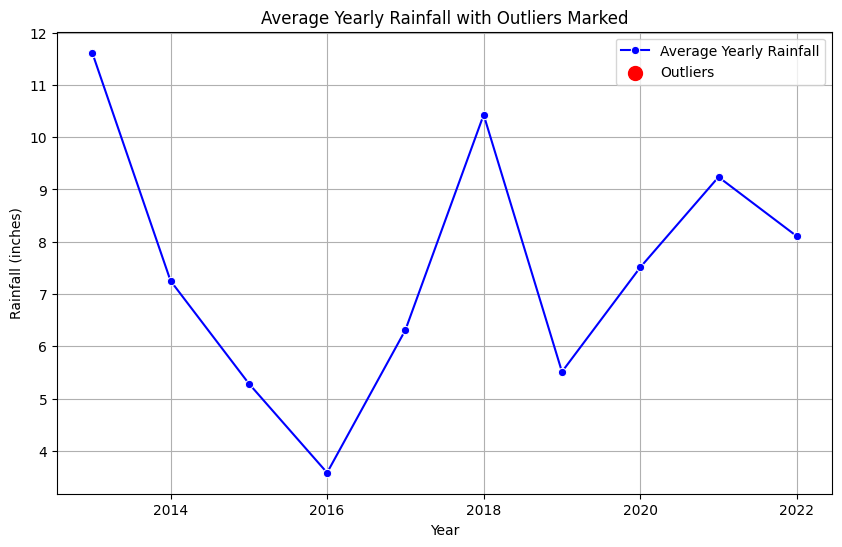

Outliers :  Series([], Name: Average_Yearly_Rainfall, dtype: float64)


In [14]:
# Identify outliers
q1 = df_average_yearly_rainfall.quantile(0.25)
q3= df_average_yearly_rainfall.quantile(0.75)
iqr = q3 - q1
lb = q1 - 1.5 * iqr
ub = q3 + 1.5 * iqr
outliers = (df_average_yearly_rainfall < lb) | (df_average_yearly_rainfall > ub)

# Create a line plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_average_yearly_rainfall, marker='o', linestyle='-', color='blue', label='Average Yearly Rainfall')

# Highlight outliers by overlaying red markers
plt.scatter(df_average_yearly_rainfall[outliers].index, df_average_yearly_rainfall[outliers], color='red', s=100, zorder=5, label='Outliers')

# Adding titles and labels
plt.title('Average Yearly Rainfall with Outliers Marked')
plt.xlabel('Year')
plt.ylabel('Rainfall (inches)')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()
print("Outliers : ",df_average_yearly_rainfall[outliers])

AVERAGE MONTHLY RAINFALL ANALYSIS (DENOTING EXTREME LEVELS OF RAINFALL)

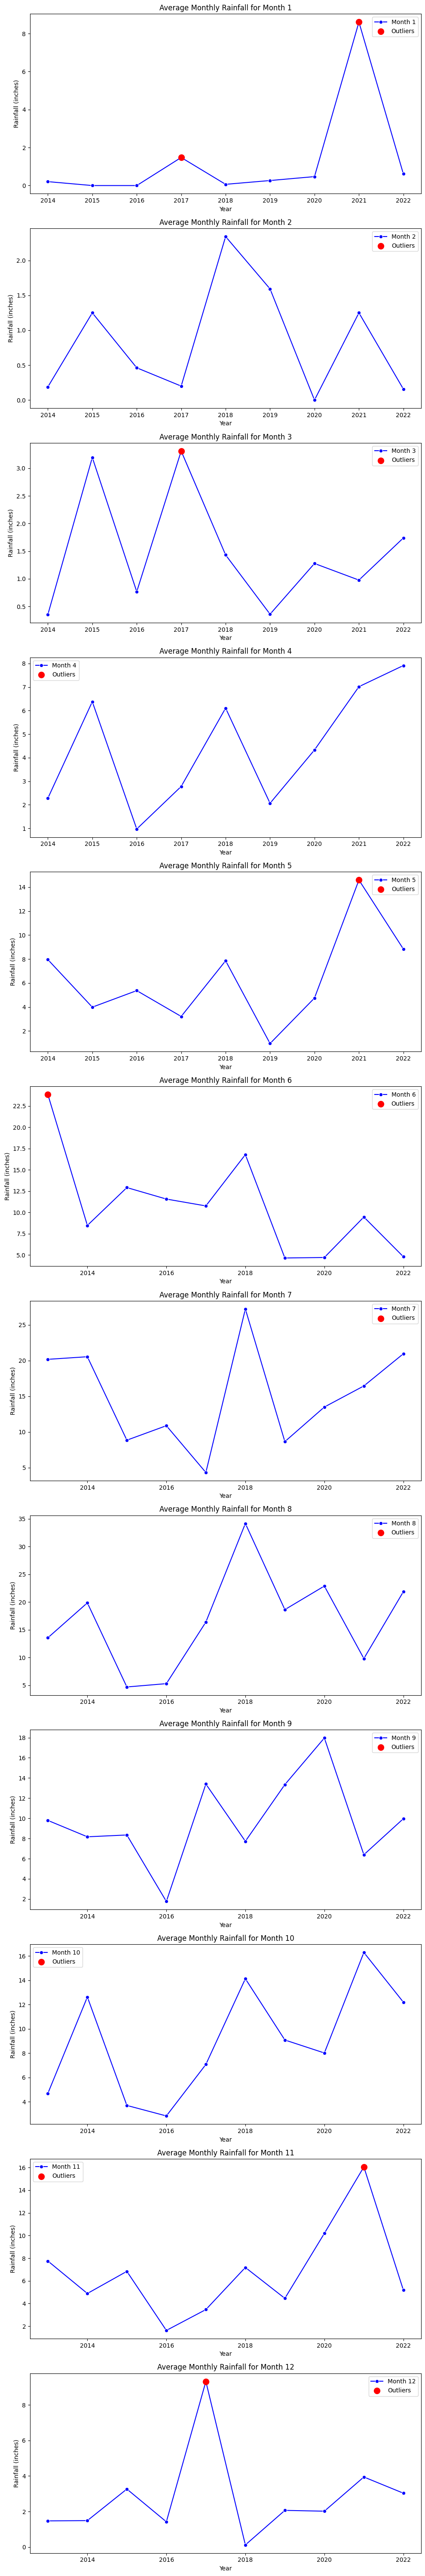

In [15]:
num_plots = 12

# Create a figure with subplots
fig, axes = plt.subplots(nrows=num_plots, ncols=1, figsize=(10, 60))

# Iterate over each month
for i in range(num_plots):
    month_col = f'Month {i+1}'
    ax = axes[i]

    # Plot the line plot for each month
    sns.lineplot(ax=ax, data=df_pivot, x=df_pivot.index, y=month_col, marker='o', linestyle='-', color='blue', label=month_col)

    # Calculate outliers using IQR
    q1 = df_pivot[month_col].quantile(0.25)
    q3 = df_pivot[month_col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = (df_pivot[month_col] < lower_bound) | (df_pivot[month_col] > upper_bound)

    # Highlight outliers with red markers
    ax.scatter(df_pivot.index[outliers], df_pivot[month_col][outliers], color='red', s=100, zorder=5, label='Outliers')

    # Set title and labels
    ax.set_title(f'Average Monthly Rainfall for {month_col}')
    ax.set_xlabel('Year')
    ax.set_ylabel('Rainfall (inches)')
    ax.legend()

# Adjust layout
plt.tight_layout()
plt.show()

MANN-KENDALL TEST AND SEN SLOPE ESTIMATOR FOR TREND ANALYSIS.
##### Mann-Kendall test : A non-parametric statistical test used to assess the presence of trends in time series data by evaluating the monotonicity of the data over time.

##### Sen Slope Estimator : A method for estimating the slope of a trend in time series data

In [16]:
print("Enter the range of years(year1 to year2)")
year1 = int(input())
year2 = int(input())
selected_years = range(year1, year2 + 1)
#selected_years = range(2012, 2023)
df_selected_years = df_pivot[df_pivot.index.isin(selected_years)]

# Perform the Mann-Kendall test
result, _ = kendalltau(df_selected_years.index, df_selected_years['Average_Yearly_Rainfall'])

# Calculate p-value for the Mann-Kendall test
p_value = 2 * norm.cdf(-abs(result))

# Perform Sen's Slope estimation
result_s = linregress(df_selected_years.index, df_selected_years['Average_Yearly_Rainfall'])

# Display Mann-Kendall test result
print(f"Mann-Kendall Test Result for Yearly Sum of Rainfall (2012 to 2022):")
print(f"Kendall's Tau: {result}")
print(f"P-value: {p_value}")

# Display Theil-Sen estimator result
print(f"Theil-Sen Estimator Result for Yearly Sum of Rainfall (2012 to 2022):")
print(f"Slope (Sen's Slope): {result_s.slope}")

# Interpret the results based on significance level and slope direction
if p_value < 0.05:
    if result_s.slope > 0:
        print("Significant positive trend")
    elif result_s.slope < 0:
        print("Significant negative trend")
    else:
        print("No significant trend")
else:
    print("No significant trend")

Enter the range of years(year1 to year2)
2012
2022
Mann-Kendall Test Result for Yearly Sum of Rainfall (2012 to 2022):
Kendall's Tau: 0.1111111111111111
P-value: 0.9115282379093772
Theil-Sen Estimator Result for Yearly Sum of Rainfall (2012 to 2022):
Slope (Sen's Slope): 0.020138400860870445
No significant trend


PETTITT TEST
##### A non-parametric statistical test used to detect a change point or discontinuity in a time series, indicating a significant shift in the distribution of the data.

In [17]:
print("Enter the range of years (year1 to year2)")
year1 = int(input())
year2 = int(input())
selected_years = range(year1, year2 + 1)
df_selected_years = df_pivot[df_pivot.index.isin(selected_years)]

# Perform Pettitt test for the selected years
result_pettitt = hg.pettitt_test(df_selected_years['Average_Yearly_Rainfall'])

# Display Pettitt test result2
print(f"Pettitt Test Result for Yearly Sum of Rainfall ({year1} to {year2}):")
print(f"Change detected: {result_pettitt.h}")
print(f"Change point index: {result_pettitt.cp}")
change_point_year = df_selected_years.index[result_pettitt.cp - 1]  # Adjust index if necessary
print(f"The change point occurs at the year: {change_point_year}")

print(f"P-value: {result_pettitt.p}")
print(f"Test Statistic (U): {result_pettitt.U}")
print(f"Mean Before Change (mu1): {result_pettitt.avg.mu1}")
print(f"Mean After Change (mu2): {result_pettitt.avg.mu2}")

Enter the range of years (year1 to year2)
2012
2022
Pettitt Test Result for Yearly Sum of Rainfall (2012 to 2022):
Change detected: False
Change point index: 5
The change point occurs at the year: 2017
P-value: 0.6406
Test Statistic (U): 11.0
Mean Before Change (mu1): 6.80919701377599
Mean After Change (mu2): 8.158304535904092


STANDARDIZED PRECIPITATION INDEX (SPI)

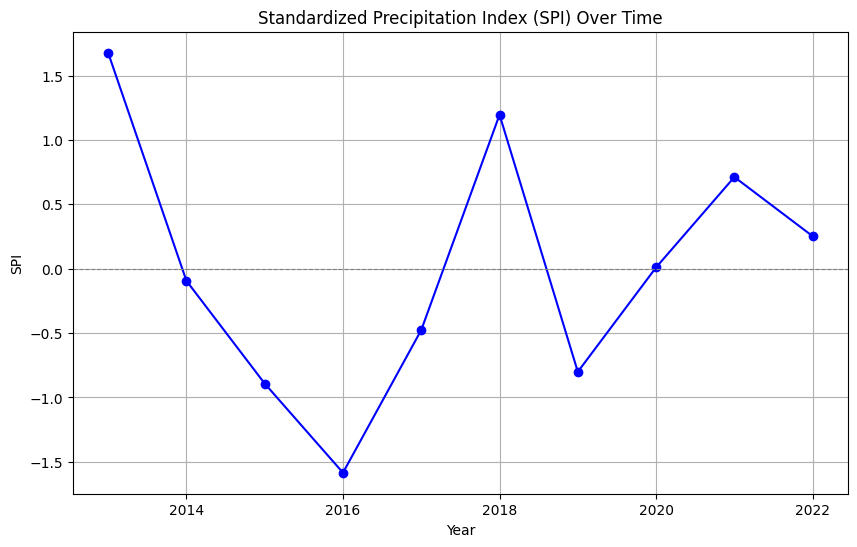

Year 2013: SPI = 1.68 (Wetter than average)
Year 2014: SPI = -0.09 (Drier than average)
Year 2015: SPI = -0.89 (Drier than average)
Year 2016: SPI = -1.58 (Drier than average)
Year 2017: SPI = -0.48 (Drier than average)
Year 2018: SPI = 1.20 (Wetter than average)
Year 2019: SPI = -0.80 (Drier than average)
Year 2020: SPI = 0.01 (Wetter than average)
Year 2021: SPI = 0.71 (Wetter than average)
Year 2022: SPI = 0.25 (Wetter than average)


In [18]:
# Calculate long-term average rainfall for each year
df_pivot_SPI = df_pivot.copy()
avg_rainfall = df_pivot_SPI['Average_Yearly_Rainfall'].mean()

# Calculate standard deviation of rainfall for each year
std_rainfall = df_pivot_SPI['Average_Yearly_Rainfall'].std()

# Calculate SPI values for each year
df_pivot_SPI['SPI'] = (df_pivot_SPI['Average_Yearly_Rainfall'] - avg_rainfall) / std_rainfall

# Plot SPI values over time
plt.figure(figsize=(10, 6))
plt.plot(df_pivot_SPI.index, df_pivot_SPI['SPI'], marker='o', linestyle='-', color='blue')
plt.axhline(0, color='gray', linestyle='--', linewidth=0.8)  # Add horizontal line at SPI=0
plt.title('Standardized Precipitation Index (SPI) Over Time')
plt.xlabel('Year')
plt.ylabel('SPI')
plt.grid(True)
plt.show()

# Analyze SPI values
for year, spi_value in zip(df_pivot_SPI.index, df_pivot_SPI['SPI']):
    if spi_value > 0:
        print(f"Year {year}: SPI = {spi_value:.2f} (Wetter than average)")
    elif spi_value < 0:
        print(f"Year {year}: SPI = {spi_value:.2f} (Drier than average)")
    else:
        print(f"Year {year}: SPI = {spi_value:.2f} (Average)")

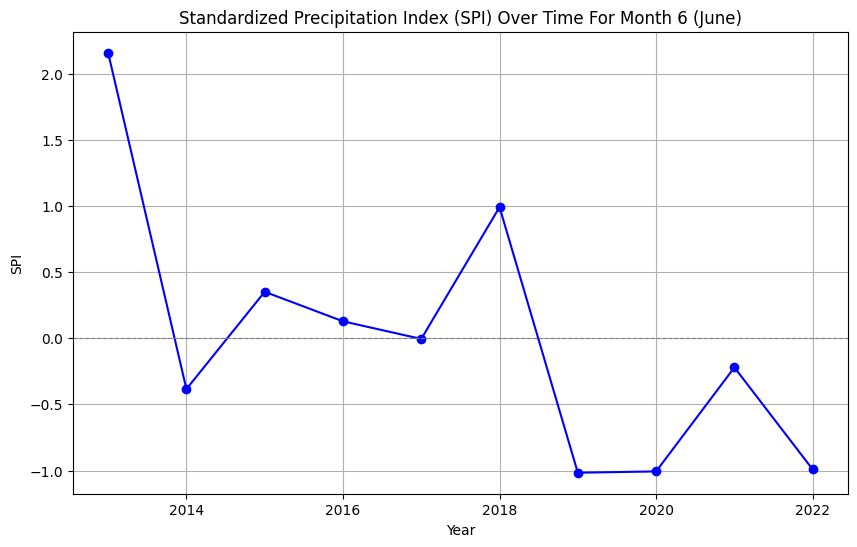

Year 2013: SPI = 2.16 (Wetter than average)
Year 2014: SPI = -0.38 (Drier than average)
Year 2015: SPI = 0.35 (Wetter than average)
Year 2016: SPI = 0.13 (Wetter than average)
Year 2017: SPI = -0.01 (Drier than average)
Year 2018: SPI = 0.99 (Wetter than average)
Year 2019: SPI = -1.02 (Drier than average)
Year 2020: SPI = -1.01 (Drier than average)
Year 2021: SPI = -0.22 (Drier than average)
Year 2022: SPI = -0.99 (Drier than average)


In [19]:
# Calculate long-term average rainfall for each year
df_pivot_SPI = df_pivot.copy()
avg_rainfall = df_pivot_SPI['Month 6'].mean()

# Calculate standard deviation of rainfall for each year
std_rainfall = df_pivot_SPI['Month 6'].std()

# Calculate SPI values for each year
df_pivot_SPI['SPI_Month_6'] = (df_pivot_SPI['Month 6'] - avg_rainfall) / std_rainfall

# Plot SPI values over time
plt.figure(figsize=(10, 6))
plt.plot(df_pivot_SPI.index, df_pivot_SPI['SPI_Month_6'], marker='o', linestyle='-', color='blue')
plt.axhline(0, color='gray', linestyle='--', linewidth=0.8)  # Add horizontal line at SPI=0
plt.title('Standardized Precipitation Index (SPI) Over Time For Month 6 (June)')
plt.xlabel('Year')
plt.ylabel('SPI')
plt.grid(True)
plt.show()

# Analyze SPI values
for year, spi_value in zip(df_pivot_SPI.index, df_pivot_SPI['SPI_Month_6']):
    if spi_value > 0:
        print(f"Year {year}: SPI = {spi_value:.2f} (Wetter than average)")
    elif spi_value < 0:
        print(f"Year {year}: SPI = {spi_value:.2f} (Drier than average)")
    else:
        print(f"Year {year}: SPI = {spi_value:.2f} (Average)")

SEASONAL DECOMPOSITION OF TIME SERIES (STL)

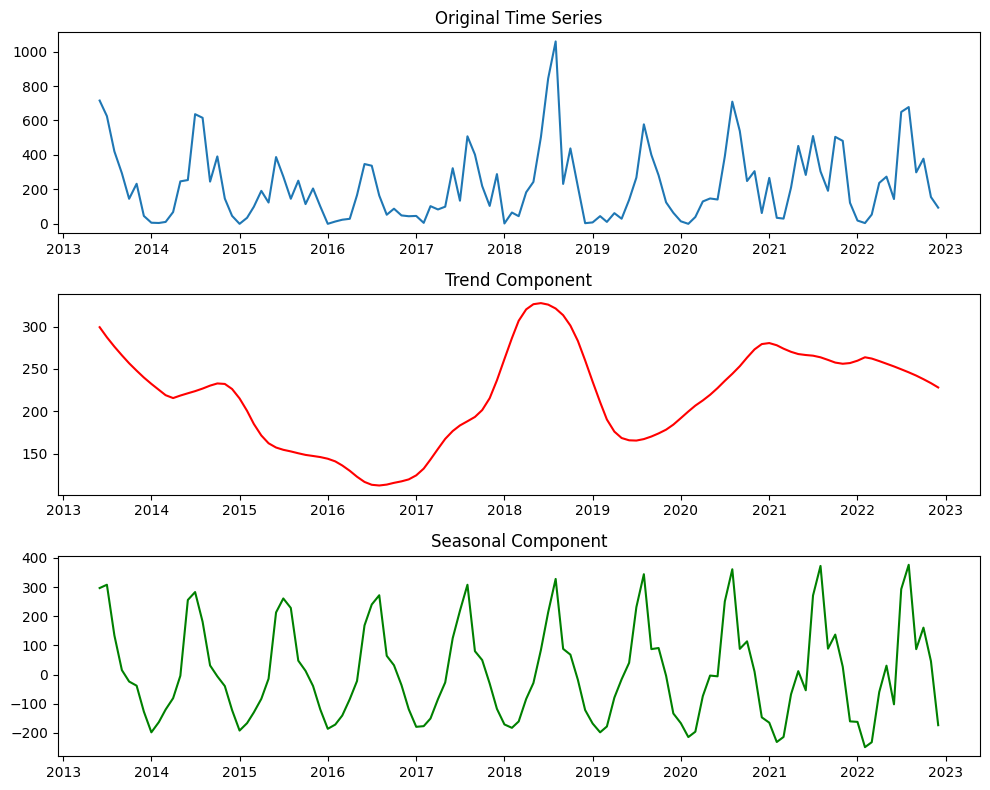

In [20]:
df = pd.read_csv(data_path_Myladumpara )
df_rainfall = df.iloc[:, 2:]

# Combine 'YEAR' and 'MN' columns to create datetime index
df['Date'] = pd.to_datetime(df['YEAR'].astype(str) + '-' + df['MN'].astype(str), format='%Y-%m')
df.set_index('Date', inplace=True)

# Drop 'YEAR' and 'MN' columns after creating datetime index
df.drop(['YEAR', 'MN'], axis=1, inplace=True)

# Perform STL decomposition with seasonal period (e.g., 12 for monthly seasonality)
try:
    # Select specific columns ('DRF01' to 'DRF31') and sum across columns to get a single time series
    stl_decomp = STL(df.loc[:, 'DRF01':'DRF31'].sum(axis=1), seasonal=13).fit()

    # Plot the decomposed components
    fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 8))

    # Plot original time series
    ax1.plot(stl_decomp.observed, label='Original')
    ax1.set_title('Original Time Series')

    # Plot trend component
    ax2.plot(stl_decomp.trend, label='Trend', color='r')
    ax2.set_title('Trend Component')

    # Plot seasonal component
    ax3.plot(stl_decomp.seasonal, label='Seasonal', color='g')
    ax3.set_title('Seasonal Component')

    # Display the plot
    plt.tight_layout()
    plt.show()

except ValueError as e:
    print(f"Error occurred during STL decomposition: {e}")